Trapezoid Method: https://www.youtube.com/watch?v=Urpi5hb5AzY
Romberg Integration: https://www.youtube.com/watch?v=uWwP0d6haDM


In [4]:
##example code
import numpy as np

##define the function we want to use
def f(x):
    return np.exp(x)

##define our variables
a = 0
b = 4
n = 2
h = (b-a)/n

##implement the algorithm to compute trapezoid approximation
tot = f(a)
for i in range(1,n):
    tot = tot + 2*f(a+i*h)
tot = tot + f(b)
tot = h/2*tot

##output the solution and compare with actual value
print(tot)
print(h/2*(f(a) + 2*f(a+h)+f(b)))

70.37626223100554
70.37626223100554


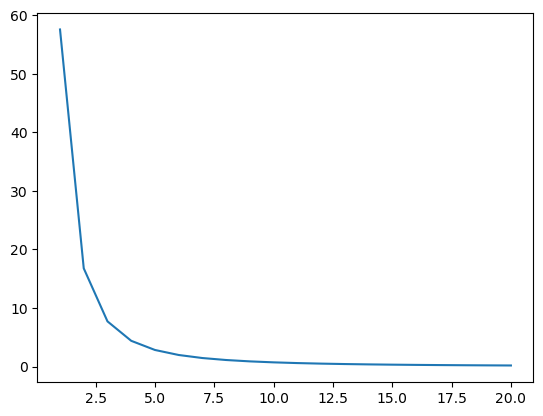

In [28]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return np.exp(x)

def trapezoid(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n):
        tot = tot + 2 * f(a + i*h)
    tot = tot + f(b)
    return h / 2 * tot

a = 0
b = 4
n = np.array(range(1, 21))
errors = np.zeros(len(n))
actual = np.exp(b) - np.exp(a)

for i in range(len(n)):
    errors[i] = abs(actual - trapezoid(a, b, n[i]))

# print out graph of errors
plt.figure(1)
plt.plot(n, errors)
plt.show()

0.2912960257960806
0.26187688949685994
0.2530845902540416
0.25077870042483863
0.25019515277271204
0.25004881813607127
0.2500122064076101
0.2500030517144234
0.2500007629787518


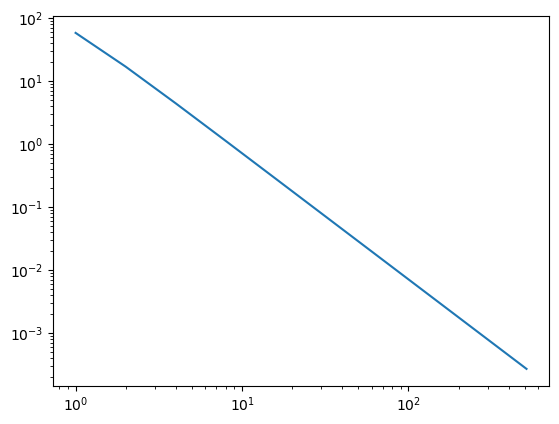

In [29]:
# declare variable
a = 0
b = 4
n = 2 ** np.array(range(10))
errors = np.zeros(len(n))
actual = np.exp(b) - np.exp(a)

for i in range(len(n)):
    errors[i] = abs(actual - trapezoid(a, b, n[i]))
    if i > 0:
        print(errors[i] / errors[i-1])
        
plt.figure(2)
plt.plot(n, errors)

plt.xscale('log')
plt.yscale('log')
plt.show()

In [30]:
import numpy as np
def f(x): 
    return np.exp(x)

def trapezoid(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n):
        tot = tot + 2 * f(a + i*h)
    tot = tot + f(b)
    return h / 2 * tot

def romberg(j, k, a, b):
    if j == 1:
        return trapezoid(a, b, 2**(k-1))
    else:
        return (4 ** (j-1) * romberg(j - 1, k + 1, a, b) - romberg(j - 1, k, a, b)) / (4**(j - 1) - 1)

a = 0
b = 4


for j in range(1, 4):
    for k in range(1, 4):
        print("I(", j, k,")=", romberg(j, k, a, b))
        
print("Actual:", np.exp(4) - 1)

I( 1 1 )= 111.19630006628847
I( 1 2 )= 70.37626223100554
I( 1 3 )= 57.99194986714948
I( 2 1 )= 56.7695829525779
I( 2 2 )= 53.863845745864126
I( 2 3 )= 53.61622079600581
I( 3 1 )= 53.670129932083206
I( 3 2 )= 53.59971246601526
I( 3 3 )= 53.59817684235064
Actual: 53.598150033144236


1. Consider the integral $ \int_{0}^{2} x^3+2 dx$. Use the trapazoid rule to compute the integral. Use $n=1, 2, 4, 8, 16, 32, 64, 128$ as your number of trapazoids. Compute the absolute relative error between the the trapazoid rule calculation and the true value. You will need to evaluate the integral by hand to compute the true vlaue. 

n = 1, Approximation = 12.0, Abs. Rel. Error = 50.0%
n = 2, Approximation = 9.0, Abs. Rel. Error = 12.5%
n = 4, Approximation = 8.25, Abs. Rel. Error = 3.125%
n = 8, Approximation = 8.0625, Abs. Rel. Error = 0.78125%
n = 16, Approximation = 8.015625, Abs. Rel. Error = 0.1953125%
n = 32, Approximation = 8.00390625, Abs. Rel. Error = 0.048828125%
n = 64, Approximation = 8.0009765625, Abs. Rel. Error = 0.01220703125%
n = 128, Approximation = 8.000244140625, Abs. Rel. Error = 0.0030517578125%


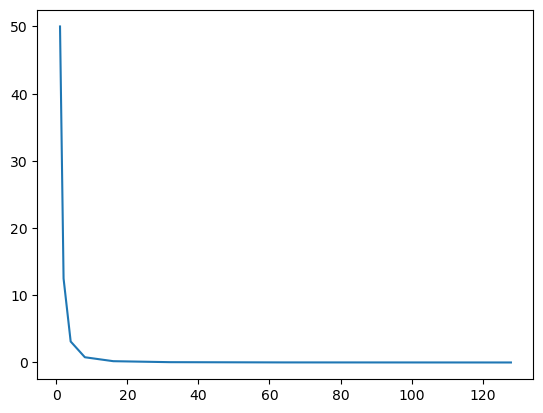

In [60]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return ((x ** 3) + 2)

def trapezoid(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n):
        tot = tot + 2 * f(a + i*h)
    tot = tot + f(b)
    return h / 2 * tot

a = 0
b = 2
n = 2 ** np.array(range(8))
errors = np.zeros(len(n))
actual = 8

for i in range(len(n)):
    errors[i] = abs((actual - trapezoid(a, b, n[i]))/actual)*100
    print(f'n = {n[i]}, Approximation = {trapezoid(a, b, n[i])}, Abs. Rel. Error = {errors[i]}%')
    
    
plt.figure(1)
plt.plot(n, errors)
plt.show()

2. Consider the integral $\int_{0}^{1} 30x(1-x)^4 dx$. Compute the integral using the trapazoid method for $n=1, 2, 4, 8, 16, 32, 64, 128$. This integral should evaluate to 1 over the interval. Plot the errors for each value of n.

n = 1, Approximation = 0.0, Abs. Rel. Error = 100.0%
n = 2, Approximation = 0.46875, Abs. Rel. Error = 53.125%
n = 4, Approximation = 0.849609375, Abs. Rel. Error = 15.0390625%
n = 8, Approximation = 0.9613037109375, Abs. Rel. Error = 3.86962890625%
n = 16, Approximation = 0.9902572631835938, Abs. Rel. Error = 0.974273681640625%
n = 32, Approximation = 0.9975600242614746, Abs. Rel. Error = 0.24399757385253906%
n = 64, Approximation = 0.9993897378444672, Abs. Rel. Error = 0.06102621555328369%
n = 128, Approximation = 0.9998474176973104, Abs. Rel. Error = 0.01525823026895523%


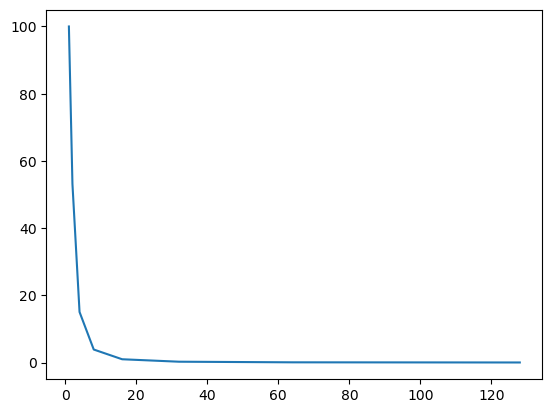

In [61]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return (30 * x) * ((1 - x)**4)

def trapezoid(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n):
        tot = tot + 2 * f(a + i*h)
    tot = tot + f(b)
    return h / 2 * tot

a = 0
b = 1
n = 2 ** np.array(range(8))
errors = np.zeros(len(n))
actual = 1

for i in range(len(n)):
    errors[i] = abs((actual - trapezoid(a, b, n[i]))/actual)*100
    print(f'n = {n[i]}, Approximation = {trapezoid(a, b, n[i])}, Abs. Rel. Error = {errors[i]}%')

plt.figure(1)
plt.plot(n, errors)
plt.show()

3. Try 1 and 2 again, this time using Simpson's 1/3 rule. Plot the errors for each respective function with both the trapazoid and Simpson's 1/3. Which method appears to be better? Note you will not be able to do the 1 segment method with Simpson's.

n = 1, Abs. Rel. Error (Trapezoid) = 0.5%
n = 1, Abs. Rel. Error (Simpson) = 3.666666666666667%
n = 2, Abs. Rel. Error (Trapezoid) = 0.125%
n = 2, Abs. Rel. Error (Simpson) = 1.0%
n = 4, Abs. Rel. Error (Trapezoid) = 0.03125%
n = 4, Abs. Rel. Error (Simpson) = 0.5%
n = 8, Abs. Rel. Error (Trapezoid) = 0.0078125%
n = 8, Abs. Rel. Error (Simpson) = 0.25%
n = 16, Abs. Rel. Error (Trapezoid) = 0.001953125%
n = 16, Abs. Rel. Error (Simpson) = 0.125%
n = 32, Abs. Rel. Error (Trapezoid) = 0.00048828125%
n = 32, Abs. Rel. Error (Simpson) = 0.0625%
n = 64, Abs. Rel. Error (Trapezoid) = 0.0001220703125%
n = 64, Abs. Rel. Error (Simpson) = 0.03125%
n = 128, Abs. Rel. Error (Trapezoid) = 3.0517578125e-05%
n = 128, Abs. Rel. Error (Simpson) = 0.015625%


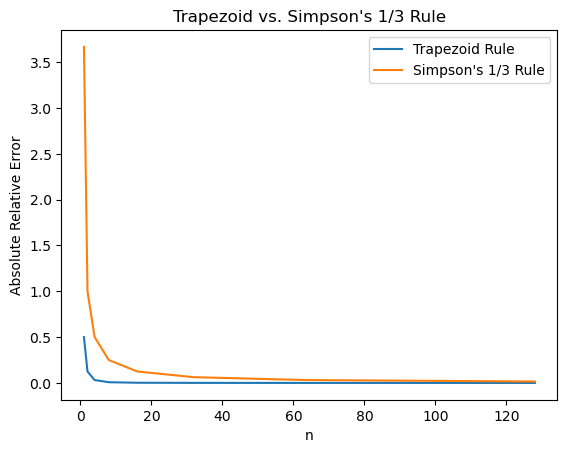

In [119]:
##1
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return ((x ** 3) + 2)

def trapezoid(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n):
        tot = tot + 2 * f(a + i*h)
    tot = tot + f(b)
    return h / 2 * tot

#https://www.codesansar.com/numerical-methods/simpsons-13-method-python-program.htm
def simpson(a, b, n): 
    h = (b - a) / n
    integration = f(a) + f(b)
    for i in range(n+1):
        k = a + i*h
        
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)
    
    # Finding final integration value
    integration = integration * h/3
    
    return integration


a = 0
b = 2
n = 2 ** np.array(range(8))
errors_trapezoid = np.zeros(len(n))
errors_simpson = np.zeros(len(n))
actual = 8

for i in range(len(n)):
    errors_trapezoid[i] = abs((actual - trapezoid(a, b, n[i])) / actual)*100
    errors_simpson[i] = abs((actual - simpson(a, b, n[i])) / actual)*100

    print(f'n = {n[i]}, Abs. Rel. Error (Trapezoid) = {errors_trapezoid[i]}%')
    print(f'n = {n[i]}, Abs. Rel. Error (Simpson) = {errors_simpson[i]}%')

plt.figure(1)
plt.plot(n, errors_trapezoid, label='Trapezoid Rule')
plt.plot(n, errors_simpson, label="Simpson's 1/3 Rule")
plt.xlabel('n')
plt.ylabel('Absolute Relative Error')
plt.title('Trapezoid vs. Simpson\'s 1/3 Rule')
plt.legend()
plt.show()
# the simpsons method seems to be better because the error decreases at a much faster rate than the trapezoid method

n = 1, Abs. Rel. Error (Trapezoid) = 100.0%
n = 1, Abs. Rel. Error (Simpson) = 100.0%
n = 2, Abs. Rel. Error (Trapezoid) = 53.125%
n = 2, Abs. Rel. Error (Simpson) = 37.5%
n = 4, Abs. Rel. Error (Trapezoid) = 15.0390625%
n = 4, Abs. Rel. Error (Simpson) = 2.34375%
n = 8, Abs. Rel. Error (Trapezoid) = 3.86962890625%
n = 8, Abs. Rel. Error (Simpson) = 0.146484375%
n = 16, Abs. Rel. Error (Trapezoid) = 0.974273681640625%
n = 16, Abs. Rel. Error (Simpson) = 0.0091552734375%
n = 32, Abs. Rel. Error (Trapezoid) = 0.24399757385253906%
n = 32, Abs. Rel. Error (Simpson) = 0.00057220458984375%
n = 64, Abs. Rel. Error (Trapezoid) = 0.06102621555328369%
n = 64, Abs. Rel. Error (Simpson) = 3.5762786865234375e-05%
n = 128, Abs. Rel. Error (Trapezoid) = 0.01525823026895523%
n = 128, Abs. Rel. Error (Simpson) = 2.2351741790771484e-06%


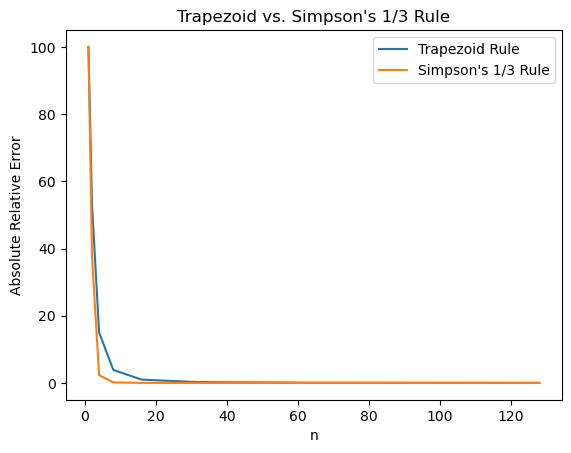

In [116]:
##2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return (30 * x) * ((1 - x)**4)

def trapezoid(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n):
        tot = tot + 2 * f(a + i*h)
    tot = tot + f(b)
    return h / 2 * tot

#https://www.codesansar.com/numerical-methods/simpsons-13-method-python-program.htm
def simpson(a, b, n):
    h = (b - a) / n
    tot = f(a)
    for i in range(1, n, 2):
        tot = tot + 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        tot = tot + 2 * f(a + i * h)
    tot = tot + f(b)
    return h / 3 * tot

a = 0
b = 1
n = 2 ** np.array(range(8))
errors_trapezoid = np.zeros(len(n))
errors_simpson = np.zeros(len(n))
actual = 1

for i in range(len(n)):
    errors_trapezoid[i] = abs((actual - trapezoid(a, b, n[i])) / actual)*100
    errors_simpson[i] = abs((actual - simpson(a, b, n[i])) / actual)*100

    print(f'n = {n[i]}, Abs. Rel. Error (Trapezoid) = {errors_trapezoid[i]}%')
    print(f'n = {n[i]}, Abs. Rel. Error (Simpson) = {errors_simpson[i]}%')

plt.figure(1)
plt.plot(n, errors_trapezoid, label='Trapezoid Rule')
plt.plot(n, errors_simpson, label="Simpson's 1/3 Rule")
plt.xlabel('n')
plt.ylabel('Absolute Relative Error')
plt.title('Trapezoid vs. Simpson\'s 1/3 Rule')
plt.legend()
plt.show()

4. Use Richardson extrapolation to compute the integral for $\int_{0}^{5} \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} dx$. Compute the 1st, 2nd, 3rd, 4th, and 5th best approximation. This is analagous to finding $I_{2,1}, I_{2,2}, I_{2,3}, I_{2,4},$ and $I_{2,5}$.

In [86]:
import numpy as np

def f(x):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp(-x**2 / 2)

def richardson_extrapolation(I_h, I_2h, k):
    return I_2h + (I_2h - I_h) / (2**k - 1)

def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    result = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        result += func(a + i * h)
    result *= h
    return result


a = 0
b = 5
h = 0.5  
I_h = trapezoidal_rule(f, a, b, int((b - a) / h))

results = [(1, I_h)]  

for k in range(1, 6):
    h /= 2
    I_2h = trapezoidal_rule(f, a, b, int((b - a) / h))
    approximation = richardson_extrapolation(I_h, I_2h, k)
    results.append((k, approximation))
    I_h = I_2h
    print(f"I(2,{k}): {approximation}")


I(2,1): 0.4999997796969715
I(2,2): 0.49999971313377534
I(2,3): 0.49999971196177473
I(2,4): 0.4999997128644705
I(2,5): 0.49999971321183356


5. Use the same integral from 4 and write code that will give a 5th order Romberg approximation for the integral. Find a 5th order extrapolation with 1st, 2nd, and 3rd best approximation.

In [91]:
import numpy as np

def f(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
n = 5

def trapezoid_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

def romberg(j, k, a, b):
    if j == 1:
        return trapezoid_rule(f, a, b, 2**(k-1))
    else:
        return (4 ** (j-1) * romberg(j - 1, k + 1, a, b) - romberg(j - 1, k, a, b)) / (4**(j - 1) - 1)

a = 0
b = 5  

for j in range(1, 6): 
    for k in range(1, j+1):
        print(f"I({j}, {k}) =", romberg(j, k, a, b))


I(1, 1) = 0.9973594178023686
I(2, 1) = 0.39088080757935134
I(2, 2) = 0.48583628849735083
I(3, 1) = 0.49216665389188413
I(3, 2) = 0.5009427087750307
I(3, 3) = 0.4999997828330629
I(4, 1) = 0.5010820112334933
I(4, 2) = 0.49998481575461895
I(4, 3) = 0.49999971216866596
I(4, 4) = 0.4999997133482684
I(5, 1) = 0.49998051302725083
I(5, 2) = 0.49999977058597594
I(5, 3) = 0.49999971335289434
I(5, 4) = 0.499999713348428
I(5, 5) = 0.49999971334842774
